In [1]:
from load_gym_compete_policy import get_policy_value_nets
import numpy as np
import tensorflow as tf
import gym

In [2]:
env_name = 'multicomp/YouShallNotPassHumans-v0'
nets0 = get_policy_value_nets(env_name, 0)
nets1 = get_policy_value_nets(env_name, 1)
env_name_2 = env_name.split('/')[1]

Creating agent humanoid_blocker
Reading agent XML from: /home/sergei/git/chai/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Creating agent humanoid
Reading agent XML from: /home/sergei/git/chai/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Scene XML path: /home/sergei/git/chai/multiagent-competition/gym_compete/new_envs/assets/world_body.humanoid_body.humanoid_body.xml
Created Scene with agents
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 380)]        0                                            
__________________________________________________________________________________________________
observation_preprocessing_layer (None, 380)          761         input_1[0][0]                    
____________________________________________

In [3]:
env = gym.make(env_name)
images = []
for episode in range(10):
    o1, o2 = env.reset()
    done = False
    while not done:
        env.render()
        images.append(env.render(mode='rgb_array'))
        a1 = nets0['policy'].predict(np.array([o1]))
        a2 = nets1['policy'].predict(np.array([o2]))
        (o1, o2), reward, done, info = env.step((a1, a2))

GLFW error: 65544, desc: b'Linux: Failed to watch for joystick connections in /dev/input: No such file or directory'
GLFW error: 65544, desc: b'Linux: Failed to open joystick device directory /dev/input: No such file or directory'


Creating agent humanoid_blocker
Reading agent XML from: /home/sergei/git/chai/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Creating agent humanoid
Reading agent XML from: /home/sergei/git/chai/multiagent-competition/gym_compete/new_envs/assets/humanoid_body.xml
Scene XML path: /home/sergei/git/chai/multiagent-competition/gym_compete/new_envs/assets/world_body.humanoid_body.humanoid_body.xml
Created Scene with agents


In [4]:
env.close()

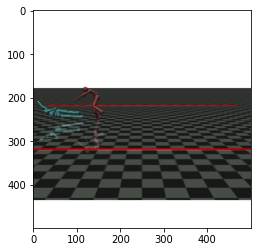

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

ims = []
for image in images:
    im = plt.imshow(image, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

ani.save(env_name_2 + '.mp4')

In [6]:
fig.show()

<ipython-input-6-6ebedab27258>:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [7]:
info, done, reward

({0: {'reward_forward': 0.0,
   'reward_ctrl': 2.4826040267944336,
   'reward_contact': 0.037890193968494294,
   'reward_survive': 5.0,
   'reward_move': 5.687835927822194,
   'agent_done': False,
   'winner': True,
   'reward_remaining': 1000.0},
  1: {'reward_forward': 0.35646124451687206,
   'reward_ctrl': 3.4228179931640628,
   'reward_contact': 0.0009043033815968967,
   'reward_survive': -5.0,
   'reward_goal_dist': -3.208330148585121,
   'reward_move': -11.275591200613908,
   'agent_done': True,
   'reward_remaining': -1000.0}},
 True,
 (1002.4795057792371, -1011.2755912006139))

In [9]:
type(env)

gym_compete.new_envs.you_shall_not_pass.HumansBlockingEnv